In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

In [32]:
raw_data = pd.read_csv("company 2.csv")
df = raw_data.copy()

In [33]:
df.dropna(inplace = True)

In [34]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
 
print(df)

      sum_amt        date
0   723116.21  2019-10-01
1   847260.44  2019-11-01
2   752641.52  2019-12-01
3   751746.18  2020-01-01
4   685571.92  2020-02-01
5   335194.70  2020-03-01
6     7308.27  2020-04-01
7    12252.70  2020-05-01
8   131141.86  2020-06-01
9   331206.61  2020-07-01
10  114567.96  2020-08-01
11  533931.12  2020-09-01
12  518393.77  2020-10-01
13  100296.12  2020-11-01
14  108576.42  2020-12-01
15  145084.68  2021-01-01
16  146664.68  2021-02-01
17  330438.96  2021-03-01
18  141479.93  2021-04-01
19  233476.07  2021-05-01
20  433023.73  2021-06-01
21  472522.98  2021-07-01
22  118273.33  2021-08-01
23  612586.74  2021-09-01
24  719741.43  2021-10-01
25  901142.82  2021-11-01
26  451484.85  2021-12-01
27  357309.69  2022-01-01
28  527036.19  2022-02-01
29  357064.03  2022-03-01
30  359429.09  2022-04-01
31  468311.91  2022-05-01
32  587075.41  2022-06-01
33  409702.40  2022-07-01
34  114024.37  2022-08-01
35  376960.20  2022-09-01
36  257061.43  2022-10-01
37  296321.0

In [35]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [36]:
df['sum_amt'] = df['sum_amt'].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2019-10-01 to 2024-04-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sum_amt  55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


<Axes: xlabel='date'>

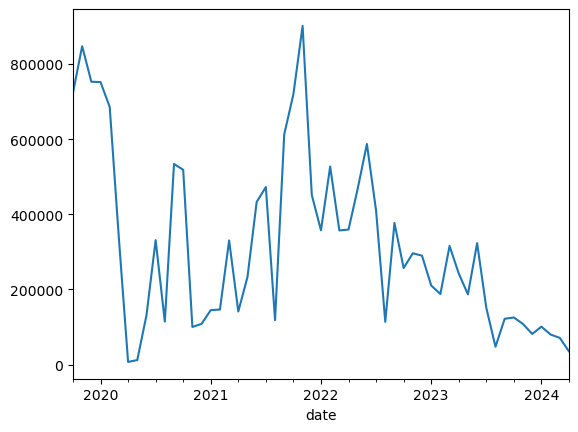

In [38]:
df['sum_amt'].plot()

In [39]:
# Extract month, quarter, and year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year

In [46]:
# Create a date range for future dates from January 1, 2029, to June 1, 2029
future_dates = pd.date_range(start='2024-05-01', end='2024-10-01', freq='MS')

# Create an empty DataFrame with the extended index
future_data = pd.DataFrame(index=future_dates)

# Fill empty values for sum_amount, month, quarter, and year with NaNs
future_data['sum_amt'] = 0
future_data['month'] = future_dates.month
future_data['quarter'] = future_dates.quarter 
future_data['year'] = future_dates.year

# Combine the original dataset with the extended future dataset
extended_data = pd.concat([df, future_data])

In [171]:
train, test = extended_data.loc[:'2022-12-01'], extended_data.loc['2023-01-01':]

In [172]:
sts.adfuller(train['sum_amt'])

(-3.21852022509314,
 0.01893737461133285,
 0,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 761.7579396117732)

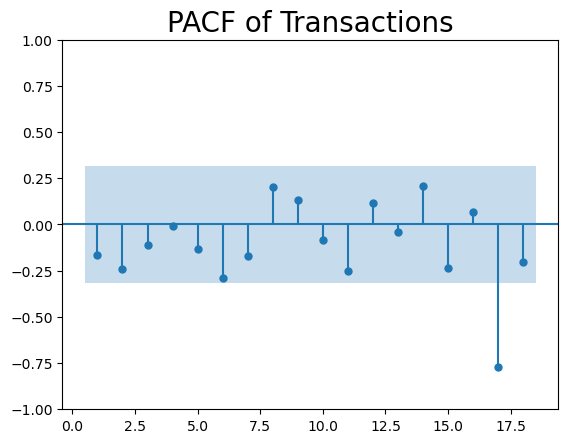

In [175]:
sgt.plot_pacf(train['sum_amt'].diff().dropna(),zero=False,lags=18,method='ols')
plt.title('PACF of Transactions',size=20)
plt.show()

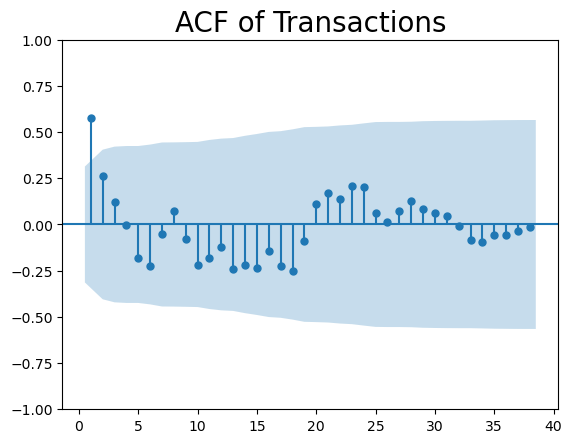

In [178]:
sgt.plot_acf(train['sum_amt'],zero=False,lags=38)
plt.title('ACF of Transactions',size=20)
plt.show()

In [200]:
test

,sum_amt,month,quarter,year
2023-01-01,210607.96,1,1,2023
2023-02-01,187979.57,2,1,2023
2023-03-01,315740.04,3,1,2023
2023-04-01,242555.38,4,2,2023
2023-05-01,187027.76,5,2,2023
2023-06-01,323368.52,6,2,2023
2023-07-01,151274.16,7,3,2023
2023-08-01,47664.56,8,3,2023
2023-09-01,122073.51,9,3,2023
2023-10-01,125539.85,10,4,2023


In [220]:
model_1 = ARIMA(train['sum_amt'], order=(0,1,17),exog = train[['month', 'quarter', 'year']])
results_1 = model_1.fit()
# results_1.summary()

D:\Users\sharesh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\sharesh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\sharesh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\sharesh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [221]:
start_date = '2023-01-01'
end_date = '2024-10-01'

predictions_1 = results_1.predict(start=len(train), end=len(train)+len(test)-1,exog=test[['month', 'quarter', 'year']][start_date:end_date])

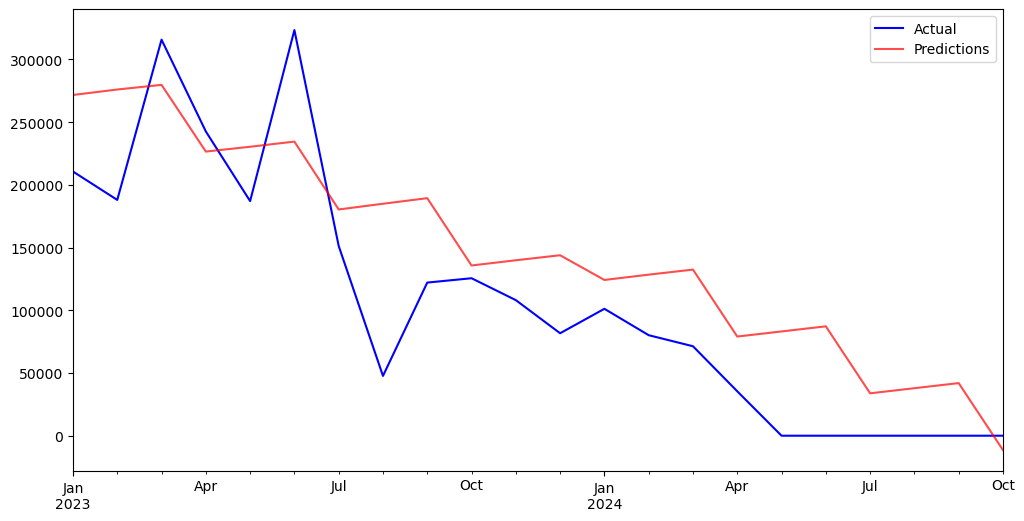

In [222]:
test['sum_amt'].plot(figsize=(12,6),color='blue',label='Actual')
predictions_1.plot(color='red',alpha=0.7,label='Predictions')
plt.legend()
plt.show()

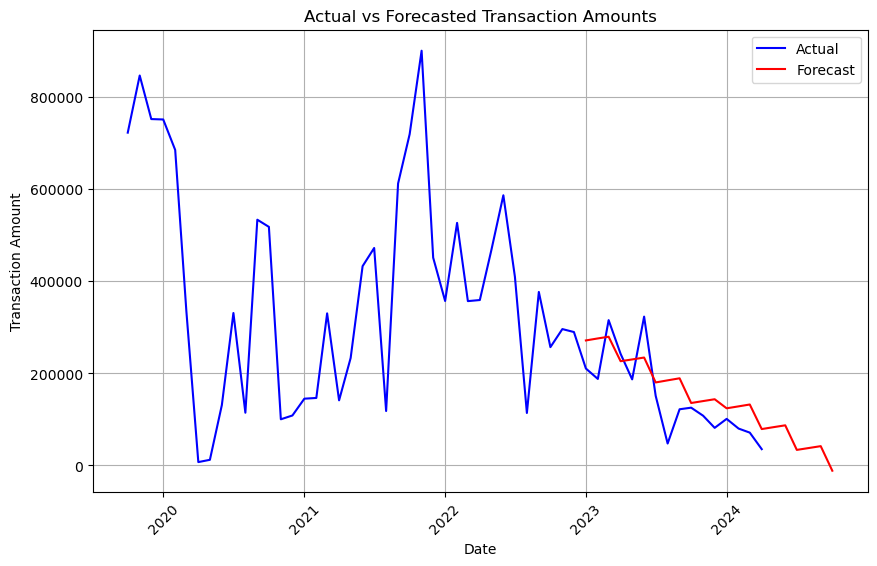

In [223]:
# Plot actual and forecasted values

plt.figure(figsize=(10, 6))
plt.plot(extended_data.index[:-6], extended_data['sum_amt'][:-6], label='Actual', color='blue')
plt.plot(test.index, predictions_1, label='Forecast', color='red')
plt.title('Actual vs Forecasted Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [224]:
print('RMSE: ',np.sqrt(mean_squared_error(test['sum_amt'][:-6],predictions_1[:-6])))

RMSE:  61490.24777380396


In [225]:
test['sum_amt'][:-6].mean()

149476.285

In [226]:
df.describe()

,sum_amt,month,quarter,year
count,55.000000,55.000000,55.000000,55.000000
mean,317289.285455,6.454545,2.490909,2021.545455
std,233957.042942,3.609751,1.168613,1.385349
min,7308.270000,1.000000,1.000000,2019.000000
25%,120173.420000,3.000000,1.000000,2020.000000
50%,289868.420000,6.000000,2.000000,2022.000000
75%,459898.380000,10.000000,4.000000,2023.000000
max,901142.820000,12.000000,4.000000,2024.000000


In [227]:
# Calculate mean directional accuracy (MDA)

def calculate_mean_directional_accuracy(actual, forecast):
    # Count the number of correct directional forecasts
    correct_direction = np.sum(np.sign(actual.diff().dropna()) == np.sign(forecast.diff().dropna()))
    
    # Total number of directional forecasts
    total_directional_forecasts = len(actual) - 1
    
    # Mean directional accuracy (MDA)
    mda = correct_direction / total_directional_forecasts
    
    return mda

mda = calculate_mean_directional_accuracy(test['sum_amt'][:-6],predictions_1[:-6])
print("Mean Directional Accuracy (MDA):", mda)

Mean Directional Accuracy (MDA): 0.4


In [228]:
predictions_1

2023-01-01    271631.298930
2023-02-01    275990.457658
2023-03-01    279692.610077
2023-04-01    226515.267426
2023-05-01    230352.112713
2023-06-01    234466.004879
2023-07-01    180353.592091
2023-08-01    184915.637912
2023-09-01    189371.959235
2023-10-01    135691.458079
2023-11-01    139864.957577
2023-12-01    143863.539722
2024-01-01    124161.278149
2024-02-01    128396.480184
2024-03-01    132426.695496
2024-04-01     79051.769919
2024-05-01     83118.181626
2024-06-01     87190.692780
2024-07-01     33793.932780
2024-08-01     37866.443934
2024-09-01     41938.955088
2024-10-01    -11457.804912
Freq: MS, Name: predicted_mean, dtype: float64